## 원-핫 인코딩(One-hot encoding)
- 참조: https://wikidocs.net/22647
- 한 개의 요소는 True, 나머지 요소는 False로 만들어 주는 기법
- 원-핫 인코딩(One-hot encoding)이 필요한 이유
 * scikit-learn에서 제공하는 머신러닝 알고리즘은 문자열 값을 입력 값으로 허락 않음
 * 따라서 문자열 값은 숫자형 자료로 인코딩 하는 전처리 작업 필요
- scikit-learn에서 제공하는 머신러닝 알고리즘에 필요한 데이터 구성
 * 모든 데이터는 숫자(정수형, 실수형 등)로 구성되어 있어야 한다.
 * 데이터에 빈 값이 없어야 한다.


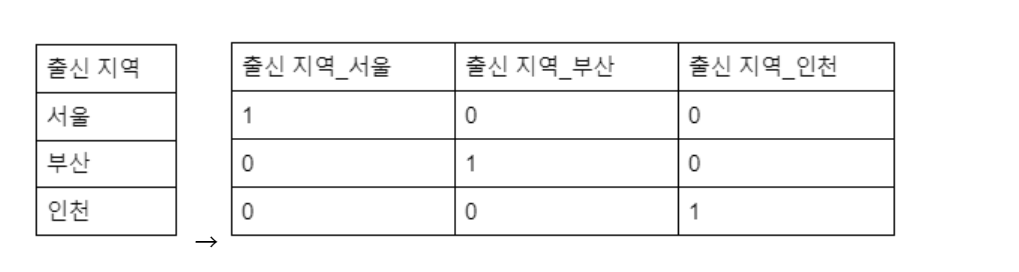

In [19]:
import pandas as pd

train = pd.DataFrame({'num1': [1, 2, 3, 4, 5], 
                      "num2":[10, 20, 30, 40, 50], 
                      "cat1": ["a", "b", "a", "c", "c"]})

In [20]:
train

,num1,num2,cat1
0,1,10,a
1,2,20,b
2,3,30,a
3,4,40,c
4,5,50,c


In [4]:
cat_lst=train.cat1.unique()   # 고유값 추출
# train['cat1'].value_counts().index

cat_num = [i for i in enumerate(cat_lst)] # 팩터 값에 대한 레이블(번호)
print(cat_lst, cat_num)

['a' 'b' 'c'] [(0, 'a'), (1, 'b'), (2, 'c')]


In [6]:
# 원-핫 인코딩

one_h_lst=[]  # 전체 데이터

for f in train.cat1:
    lst=[] # 각 행단위 데이터
    for i in cat_lst:
        if i == f:
            lst.append(1)
        else:
            lst.append(0)
    one_h_lst.append(lst)

print(one_h_lst)
        


[[1, 0, 0], [0, 1, 0], [1, 0, 0], [0, 0, 1], [0, 0, 1]]


In [8]:
train_one = pd.concat([train, pd.DataFrame(one_h_lst, columns = cat_lst)], axis = 1)
train_one

,num1,num2,cat1,a,b,c
0,1,10,a,1,0,0
1,2,20,b,0,1,0
2,3,30,a,1,0,0
3,4,40,c,0,0,1
4,5,50,c,0,0,1


In [10]:
train_1 = pd.get_dummies(train, columns=['cat1'], prefix="cat1")
train_1

,num1,num2,cat1_a,cat1_b,cat1_c
0,1,10,1,0,0
1,2,20,0,1,0
2,3,30,1,0,0
3,4,40,0,0,1
4,5,50,0,0,1


pandas 모듈 사용

In [21]:

# true/False
train_tf = train.copy()
cat_lst = train_tf['cat1'].value_counts().index
for cat in cat_lst:
    train_tf[f'cat1_{cat}'] = train['cat1'] == cat

train_tf

,num1,num2,cat1,cat1_a,cat1_c,cat1_b
0,1,10,a,True,False,False
1,2,20,b,False,False,True
2,3,30,a,True,False,False
3,4,40,c,False,True,False
4,5,50,c,False,True,False


### sklearn-OneHotEncoder 이용

In [ ]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse = False)
train_cat = ohe.fit_transform(train[['cat1']])
print(train_cat)

In [23]:
ohe.categories_[0]

array(['a', 'b', 'c'], dtype=object)

In [18]:
pd.DataFrame(train_cat, columns = ['cat1_' + cal for cal in ohe.categories_])

,cat1_a,cat1_b,cat1_c
0,1.0,0.0,0.0
1,0.0,1.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [24]:
# train.drop(columns = 'cat1')
# train.drop('cat1' = axis = 1)

pd.concat([train.drop(columns = 'cat1'),
           pd.DataFrame(train_cat, columns = ['cat1_' + cal for cal in ohe.categories_[0]]) ],
          axis = 1)

,num1,num2,cat1_a,cat1_b,cat1_c
0,1,10,1.0,0.0,0.0
1,2,20,0.0,1.0,0.0
2,3,30,1.0,0.0,0.0
3,4,40,0.0,0.0,1.0
4,5,50,0.0,0.0,1.0


### 성적표를 이용한 원-핫 인코딩

In [26]:
import pandas as pd
import numpy as np

# 성적 데이터 읽어오기
df = pd.read_csv('./data/성적표.csv', encoding='cp949')
df.head()

,순번,이름,학과,남/여,학년,이론,실기
0,1,송윤재,환경디자인원예학과,여자,2,NaN,NaN
1,2,강민형,사회복지학과,여자,3,NaN,NaN
2,3,강예린,환경디자인원예학과,여자,3,NaN,NaN
3,4,고보빈,경영학과,여자,4,NaN,NaN
4,5,김다정,보건관리학과,여자,3,NaN,NaN


In [32]:
# 이론/실기의 NaN 값을 60~100 사이의 임의 값으로 채우기
# np.random.randint(60, 101, size = 10) => 60~100 사이값의 임의 값 10개 생성
df.이론 = np.random.randint(60,101, len(df))
df.실기 = np.random.randint(60,101, len(df))
df.head()

,순번,이름,학과,남/여,학년,이론,실기
0,1,송윤재,환경디자인원예학과,여자,2,63,68
1,2,강민형,사회복지학과,여자,3,99,92
2,3,강예린,환경디자인원예학과,여자,3,88,84
3,4,고보빈,경영학과,여자,4,82,88
4,5,김다정,보건관리학과,여자,3,78,66


In [31]:
np.random.randint(60, 101, len(df))

array([ 81,  95,  70,  88,  90,  66,  67,  89,  63,  79,  60, 100,  72,
        62,  87,  62,  94,  60,  86,  89,  89,  75,  70,  69,  83,  96,
        70,  71,  73,  78,  64,  75,  79,  74,  62])

In [37]:
# 학과 레이블 인코딩
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_num = le.fit_transform(df.학과)
print(le_num)
print(le.classes_)

df['학과코드'] = list(le_num)
df.head()

[16  7 16  4  6  8 14 15 14  7  9  3  4 15  4  2  4 14  0 12 10 10  6 13
  3 13  4  5 12 16  3  1 12  1 11]
['IT융합공학과' '간호학과' '건축학과' '경영정보학과' '경영학과' '동물생명자원학과' '보건관리학과' '사회복지학과'
 '상담심리학과' '식품영양학과' '영어영문학전공' '영어통번역전공' '음악학과' '일본어과' '중국어과' '화학생명과학과'
 '환경디자인원예학과']


,순번,이름,학과,남/여,학년,이론,실기,학과코드
0,1,송윤재,환경디자인원예학과,여자,2,63,68,16
1,2,강민형,사회복지학과,여자,3,99,92,7
2,3,강예린,환경디자인원예학과,여자,3,88,84,16
3,4,고보빈,경영학과,여자,4,82,88,4
4,5,김다정,보건관리학과,여자,3,78,66,6


In [39]:
pd.get_dummies(df['남/여'])

,남자,여자
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1
5,1,0
6,0,1
7,0,1
8,0,1
9,0,1


In [ ]:
df = pd.concat([df.drop(columns = '남/여'),
          pd.get_dummies(df['남/여'])], 
          axis = 1)

In [44]:
df

,순번,이름,학과,학년,이론,실기,학과코드,남자,여자
0,1,송윤재,환경디자인원예학과,2,63,68,16,0,1
1,2,강민형,사회복지학과,3,99,92,7,0,1
2,3,강예린,환경디자인원예학과,3,88,84,16,0,1
3,4,고보빈,경영학과,4,82,88,4,0,1
4,5,김다정,보건관리학과,3,78,66,6,0,1
5,6,김두언,상담심리학과,2,86,76,8,1,0
6,7,김민지,중국어과,3,60,72,14,0,1
7,8,김수현,화학생명과학과,3,75,83,15,0,1
8,9,김영서,중국어과,4,71,72,14,0,1
9,10,김예은,사회복지학과,2,97,61,7,0,1


In [45]:
df = pd.concat([df.drop(columns = '학과'), pd.get_dummies(df.학과)], 
          axis = 1)

In [46]:
df

,순번,이름,학년,이론,실기,학과코드,남자,여자,IT융합공학과,간호학과,...,사회복지학과,상담심리학과,식품영양학과,영어영문학전공,영어통번역전공,음악학과,일본어과,중국어과,화학생명과학과,환경디자인원예학과
0,1,송윤재,2,63,68,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,강민형,3,99,92,7,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
2,3,강예린,3,88,84,16,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,고보빈,4,82,88,4,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,김다정,3,78,66,6,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
5,6,김두언,2,86,76,8,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
6,7,김민지,3,60,72,14,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
7,8,김수현,3,75,83,15,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
8,9,김영서,4,71,72,14,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
9,10,김예은,2,97,61,7,0,1,0,0,...,1,0,0,0,0,0,0,0,0,0
